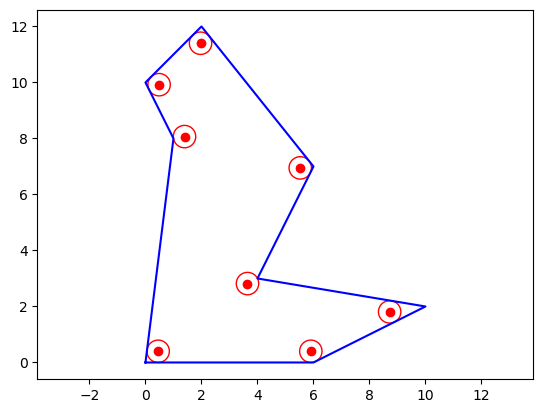

In [4]:
"""import matplotlib as plt
import path_plan
boundary_vertices = [ [0,0],[1,8],[0,10],[2,12],
                        [6,7],[4,3],[10,2],[6,0],[0,0]]
inside_pt = [1,1.2]
r = .4

q_mat = path_plan."""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import path_plan
from matplotlib.patches import Circle

# Assuming construct_q_list and other dependent functions are defined elsewhere in your Jupyter Notebook

# Boundary vertices as per the MATLAB code
boundary_vertices = np.array([
    [0, 0],
    [1, 8],
    [0, 10],
    [2, 12],
    [6, 7],
    [4, 3],
    [10, 2],
    [6, 0],
    [0, 0]
])

inside_pt = np.array([1, 1.2])
r = .4

# Construct the q_list using the provided function
q_mat = path_plan.construct_q_list(boundary_vertices, inside_pt, r)

# Plot the boundary and the q_mat points
plt.plot(boundary_vertices[:, 0], boundary_vertices[:, 1], 'b-')  # Plot boundary vertices
plt.plot(q_mat[:, 0], q_mat[:, 1], 'ro')  # Plot q_mat points

# Draw circles around q_mat points
for point in q_mat:
    circle = Circle((point[0], point[1]), radius=np.abs(r), fill=False, color='r')
    plt.gca().add_patch(circle)

plt.axis('equal')
plt.show()



0
1


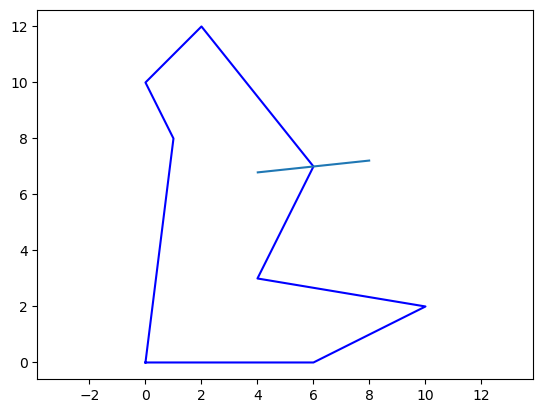

In [5]:
import numpy as np
import path_plan
# Assuming the find_bisector function is defined as before
# def find_bisector(P0, P1, P2, Pq0):
#     ...

# Assuming the check_line_intersect function is defined as before
# def check_line_intersect(x1, y1, x2, y2, x3, y3, x4, y4):
#     ...

# Points as per the MATLAB code
points = np.array([
    [2, 12],
    [6, 7],
    [4, 3]
])

P0 = points[0]
P1 = points[1]
P2 = points[2]
qlast = np.array([1, 1.3])

# Find bisector
offset_vector = path_plan.find_bisector(P0, P1, P2, qlast)

# Calculate bisector line end points
bisector_line = np.array([
    [P1[0] + 2 * offset_vector[0], P1[1] + 2 * offset_vector[1]],
    [P1[0] - 2 * offset_vector[0], P1[1] - 2 * offset_vector[1]]
])

# Point to check
chk = np.array([6.05, 6.9149])
Pq0 = qlast

# Check line intersection
intersect1 = path_plan.check_line_intersect(Pq0[0], Pq0[1], chk[0], chk[1], P0[0], P0[1], P1[0], P1[1])
intersect2 = path_plan.check_line_intersect(Pq0[0], Pq0[1], chk[0], chk[1], P2[0], P2[1], P1[0], P1[1])

print(intersect1)
print(intersect2)

plt.plot(boundary_vertices[:, 0], boundary_vertices[:, 1], 'b-')  # Plot boundary vertices

plt.plot(bisector_line[:,0],bisector_line[:,1])

plt.axis('equal')
plt.show()


[0, 1, 2, 6, 5, 9, 14, 26, 38, 39, 44, 48, 53, 58, 62, 66, 69, 67, 71, 72, 70, 68, 63, 59, 64, 65, 60, 54, 49, 45, 40, 50, 61, 55, 51, 56, 46, 41, 33, 34, 28, 32, 27, 31, 20, 21, 15, 10, 11, 16, 22, 17, 23, 24, 29, 35, 42, 47, 57, 52, 43, 36, 37, 30, 25, 19, 13, 18, 12, 7, 3, 8, 4]


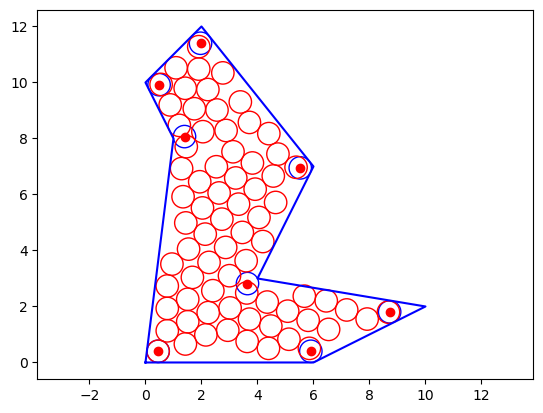

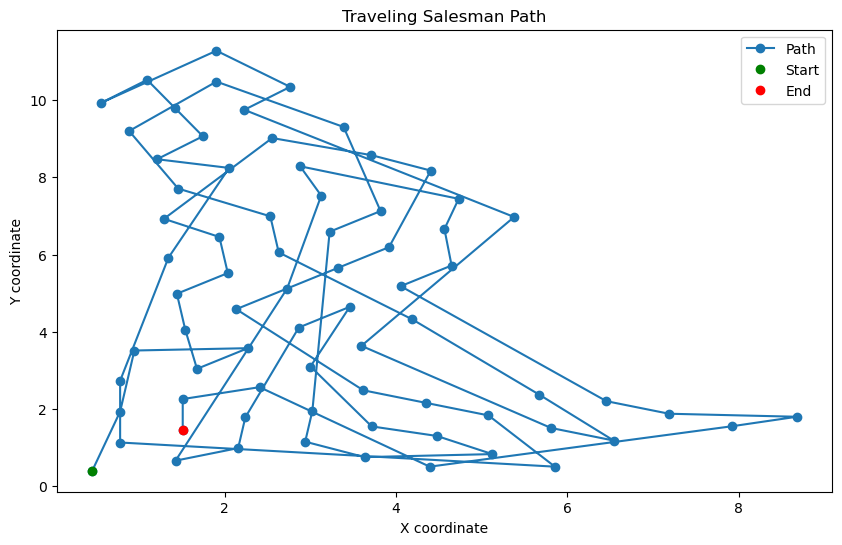

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import path_plan
from matplotlib.patches import Circle
from python_tsp.heuristics import solve_tsp_simulated_annealing


# Assuming construct_q_list and other dependent functions are defined elsewhere in your Jupyter Notebook

# Boundary vertices as per the MATLAB code
boundary_vertices = np.array([
    [0, 0],
    [1, 8],
    [0, 10],
    [2, 12],
    [6, 7],
    [4, 3],
    [10, 2],
    [6, 0],
    [0, 0]
])

inside_pt = np.array([1, 1.2])
r = .4

# Construct the q_list using the provided function
q_mat = path_plan.construct_q_list(boundary_vertices, inside_pt, r)

#center_list = path_plan.place_circles(q_mat,r,q_mat[0,:],60)

center_list = path_plan.place_circles_bfs(q_mat,r,q_mat[0,:],60)

route,value = path_plan.simulated_annealing(center_list)

dist_mat = path_plan.create_distance_matrix(center_list)
permutation, distance = solve_tsp_simulated_annealing(dist_mat)

route = permutation

print(permutation)


# Plot the boundary and the q_mat points
plt.plot(boundary_vertices[:, 0], boundary_vertices[:, 1], 'b-')  # Plot boundary vertices
plt.plot(q_mat[:, 0], q_mat[:, 1], 'ro')  # Plot q_mat points

# Draw circles around q_mat points

for point in q_mat:
    circle = Circle((point[0], point[1]), radius=np.abs(r), fill=False, color='b')
    plt.gca().add_patch(circle)

for point in center_list:
    circle = Circle((point[0], point[1]), radius=np.abs(r), fill=False, color='r')
    plt.gca().add_patch(circle)

plt.axis('equal')
plt.show()

path_plan.plot_best_path(center_list,route)
#print(route)
#plt.plot(route[0,:],route[1,:])


